In [1]:
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
website_url = "https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2020_en_Argentina"
website = requests.get(website_url).text

In [3]:
soup = BeautifulSoup(website,"html.parser")

In [4]:
tables = soup.find_all("table",{"class":"wikitable"})

In [5]:
table = pd.read_html(str(tables[1]))

In [6]:
df = table[0]

In [7]:
df

,Día,Casos confirmados,Casos acumulados,Nuevas muertes,Recuperaciones
0,3 de marzo,1,1,0,0
1,4 de marzo,0,1,0,0
2,5 de marzo,1,2,0,0
3,6 de marzo,6,8,0,0
4,7 de marzo,1,9,1,0
5,8 de marzo,3,12,0,0
6,9 de marzo,5,17,0,0
7,10 de marzo,2,19,0,0
8,11 de marzo,2,21,0,0
9,12 de marzo,10,31,0,1


In [8]:
df.drop(df.tail(1).index,inplace=True)

In [9]:
df.columns

Index(['Día', 'Casos confirmados', 'Casos acumulados', 'Nuevas muertes',
       'Recuperaciones'],
      dtype='object')

In [10]:
df.rename(columns={"Día":"Dia",
                   "Casos confirmados":"Confirmados",
                   "Casos acumulados":"Total_Confirmados",
                   "Nuevas muertes":"Muertos",
                   "Recuperaciones":"Recuperados"
                  }, inplace=True)

In [11]:
months_map = {
  "enero": "Jan",
  "febrero": "Feb",
  "marzo": "Mar",
  "abril": "Apr",
  "mayo": "May",
  "junio": "Jun",
  "julio": "Jul",
  "agosto": "Aug",
  "septiembre": "Sep",
  "octubre": "Oct",
  "noviembre": "Nov",
  "diciembre": "Dic"
}

def convertDate(date):
    date_to_return = str(date).replace(" de "," ")
    date_to_return = date_to_return + " 2020"

    for month, translatedMonth in months_map.items():
        date_to_return = date_to_return.replace(month, translatedMonth)

    return datetime.datetime.strptime(date_to_return,"%d %b %Y")

def convertNumber(x):
    return int(x.split("[")[0])

In [12]:
df.Dia = df.Dia.apply(lambda x : convertDate(x))
df.Confirmados = df.Confirmados.apply(lambda x : convertNumber(x))
df.Total_Confirmados = df.Total_Confirmados.apply(lambda x : convertNumber(x))
df.Muertos = df.Muertos.apply(lambda x : convertNumber(x))
df.Recuperados = df.Recuperados.apply(lambda x : convertNumber(x))

In [13]:
df["Total_Muertos"] = df.Muertos.cumsum()
df["Total_Recuperados"] = df.Recuperados.cumsum()

In [14]:
df = df[["Dia","Confirmados","Muertos","Recuperados","Total_Confirmados","Total_Muertos","Total_Recuperados"]].set_index("Dia")

In [15]:
df

,Confirmados,Muertos,Recuperados,Total_Confirmados,Total_Muertos,Total_Recuperados
Dia,,,,,,
2020-03-03,1,0,0,1,0,0
2020-03-04,0,0,0,1,0,0
2020-03-05,1,0,0,2,0,0
2020-03-06,6,0,0,8,0,0
2020-03-07,1,1,0,9,1,0
2020-03-08,3,0,0,12,1,0
2020-03-09,5,0,0,17,1,0
2020-03-10,2,0,0,19,1,0
2020-03-11,2,0,0,21,1,0


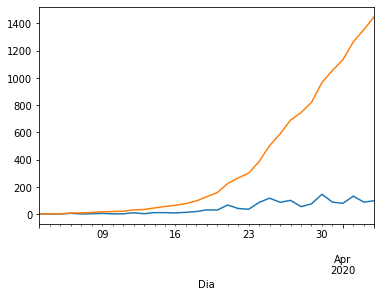

In [16]:
df.Confirmados.plot()
df.Total_Confirmados.plot()

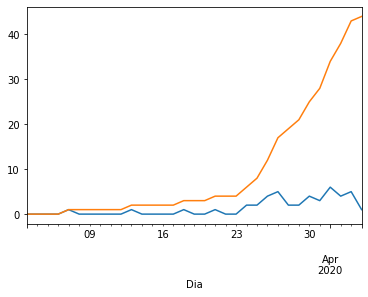

In [17]:
df.Muertos.plot()
df.Total_Muertos.plot()

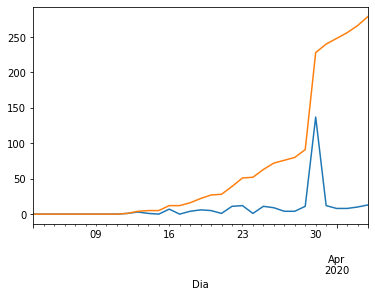

In [18]:
df.Recuperados.plot()
df.Total_Recuperados.plot()

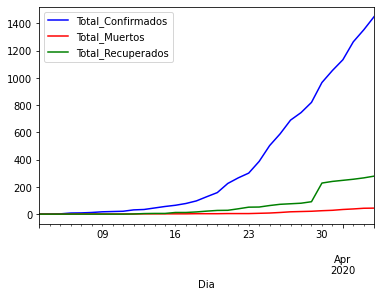

In [19]:
df.Total_Confirmados.plot(color='blue',legend = True)
df.Total_Muertos.plot(color='red', legend = True)
df.Total_Recuperados.plot(color='green', legend = True)